In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

In [2]:
relationship_df = pd.read_csv('country_relationship.csv') 

In [3]:
relationship_df

,Unnamed: 0,source,target,value
0,0,France,Russia,12
1,1,Germany,Russia,26
2,2,Bulgaria,Germany,6
3,3,Bulgaria,Russia,6
4,4,Germany,Italy,26
...,...,...,...,...
74,74,Greece,Italy,4
75,75,Italy,Japan,6
76,76,Romania,Russia,6
77,77,India,Lebanon,3


In [4]:
relationship_df.drop(['Unnamed: 0'], axis='columns', inplace=True)


In [5]:
#cheking output
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,26
2,Bulgaria,Germany,6
3,Bulgaria,Russia,6
4,Germany,Italy,26
...,...,...,...
74,Greece,Italy,4
75,Italy,Japan,6
76,Romania,Russia,6
77,India,Lebanon,3


In [6]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## Graph visualization - Networkx

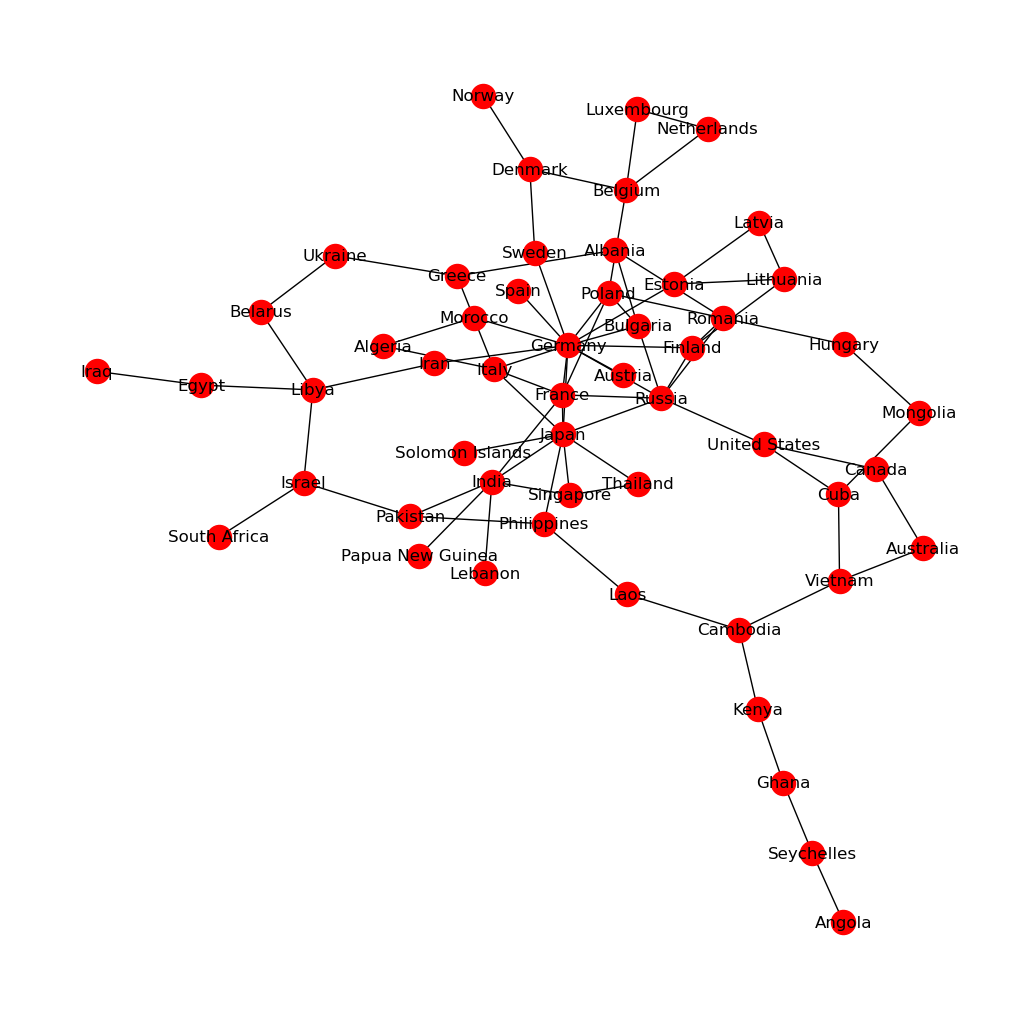

In [8]:
plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout (G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)

In [9]:
plt.savefig('networkx_plt_country.png')

<Figure size 640x480 with 0 Axes>

## Interactive Visualization

In [11]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
Node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, Node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_= True)
net.repulsion()
net.show("country.html")


country.html


## Community detection - Leiden algorithm

In [13]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'graph_tool', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [14]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [15]:
new_com = coms.to_node_community_map()

In [16]:
new_com

defaultdict(list,
            {'France': [0],
             'Russia': [0],
             'Germany': [0],
             'Bulgaria': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Albania': [0],
             'Romania': [0],
             'Japan': [1],
             'Thailand': [1],
             'Singapore': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'India': [1],
             'Pakistan': [1],
             'Papua New Guinea': [1],
             'Lebanon': [1],
             'Hungary': [2],
             'Mongolia': [2],
             'Cuba': [2],
             'United States': [2],
             'Canada': [2],
             'Australia': [2],
             'Vietnam': [2],
             'Belarus': [3],
             'Libya': [3],
             'Egypt': [3],
             'Iraq': [3],
             'Israel': [3],
             'South Africa': [3],
             'Iran': [3],
         

In [17]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [18]:
dict_com

{'France': 0,
 'Russia': 0,
 'Germany': 0,
 'Bulgaria': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Albania': 0,
 'Romania': 0,
 'Japan': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Papua New Guinea': 1,
 'Lebanon': 1,
 'Hungary': 2,
 'Mongolia': 2,
 'Cuba': 2,
 'United States': 2,
 'Canada': 2,
 'Australia': 2,
 'Vietnam': 2,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Israel': 3,
 'South Africa': 3,
 'Iran': 3,
 'Laos': 4,
 'Cambodia': 4,
 'Kenya': 4,
 'Ghana': 4,
 'Seychelles': 4,
 'Angola': 4,
 'Belgium': 5,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5,
 'Italy': 6,
 'Greece': 6,
 'Ukraine': 6,
 'Morocco': 6,
 'Algeria': 6,
 'Estonia': 7,
 'Latvia': 7,
 'Lithuania': 7}

In [19]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

country_communities_leiden.html



The visualization's partitioning reflects the historical events and geopolitical realities of the 20th century.
The clusters represent groups of countries closely linked through wars, colonial history, alliances, or ideological battles. The partitions accurately show the complex web of alliances, conflicts, and shared histories that shaped the 20th century. They also provide insights into the global impact of regional events and how different parts of the world were interconnected during this period.



## The most important countries in Events of 20th Century

In [21]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.11538461538461539,
 'Russia': 0.13461538461538464,
 'Germany': 0.25,
 'Bulgaria': 0.07692307692307693,
 'Italy': 0.09615384615384616,
 'Austria': 0.019230769230769232,
 'Spain': 0.019230769230769232,
 'Poland': 0.09615384615384616,
 'Estonia': 0.057692307692307696,
 'Latvia': 0.038461538461538464,
 'Lithuania': 0.057692307692307696,
 'Finland': 0.07692307692307693,
 'Belgium': 0.07692307692307693,
 'Netherlands': 0.038461538461538464,
 'Luxembourg': 0.038461538461538464,
 'Denmark': 0.057692307692307696,
 'Norway': 0.019230769230769232,
 'Sweden': 0.038461538461538464,
 'Albania': 0.057692307692307696,
 'Greece': 0.057692307692307696,
 'Ukraine': 0.038461538461538464,
 'Belarus': 0.038461538461538464,
 'Libya': 0.07692307692307693,
 'Egypt': 0.038461538461538464,
 'Iraq': 0.019230769230769232,
 'Japan': 0.17307692307692307,
 'Morocco': 0.038461538461538464,
 'Algeria': 0.038461538461538464,
 'Thailand': 0.038461538461538464,
 'Singapore': 0.057692307692307696,
 'Philippine

In [50]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [52]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

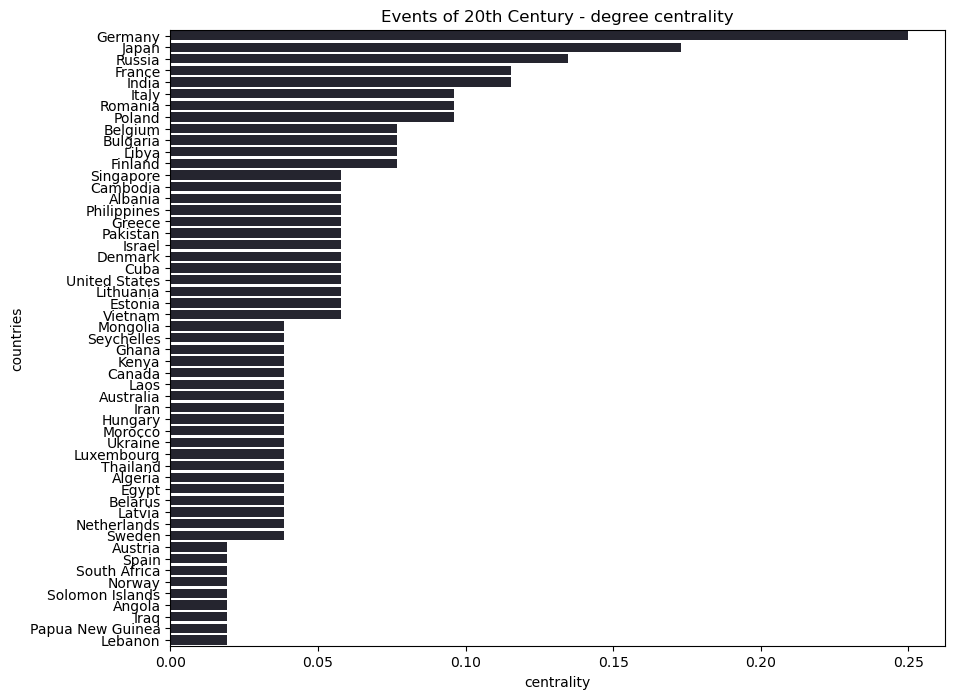

In [56]:
# Plot the degree centrality

plt.figure(figsize = (10,8))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("Events of 20th Century - degree centrality")

The bar chart shows that Germany, Japan, and Russia were the most important countries in the network of events in the 20th century. It demonstrates how different regions and countries were connected, with European and major Asian nations playing central roles, while African and Middle Eastern countries were less important. This measures each country's involvement in the important events of the century.

In [59]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [62]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

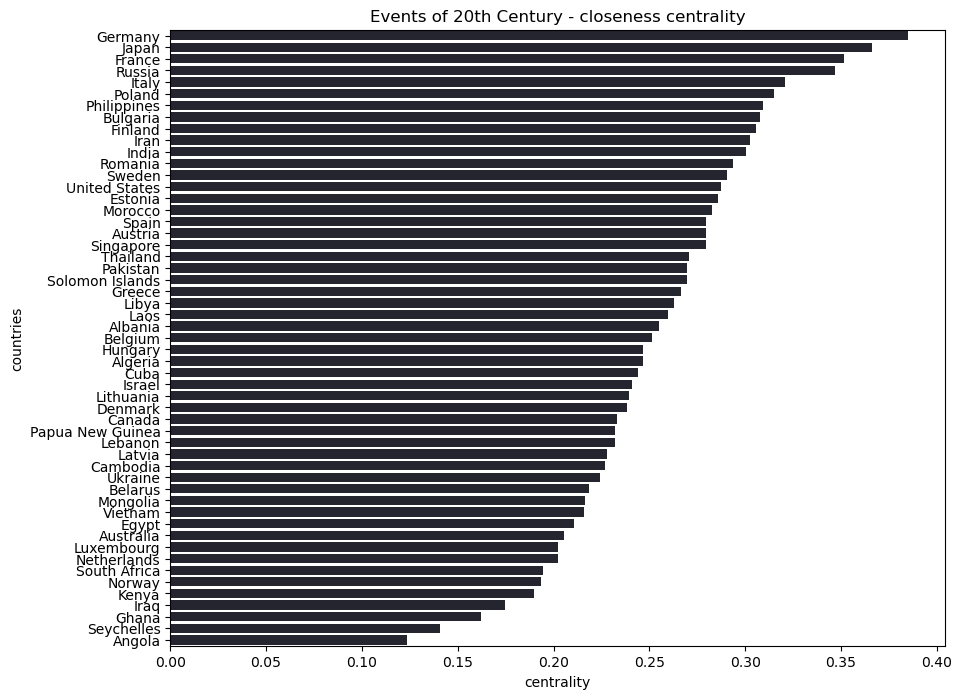

In [67]:
plt.figure(figsize = (10, 8))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("Events of 20th Century - closeness centrality")

Notably, countries with high closeness centrality, such as Germany, Japan, and France, played pivotal roles in shaping the 20th-century geopolitical landscape. Conversely, countries with lower scores were significantly more isolated and had less influence on a global scale.



In [71]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [74]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

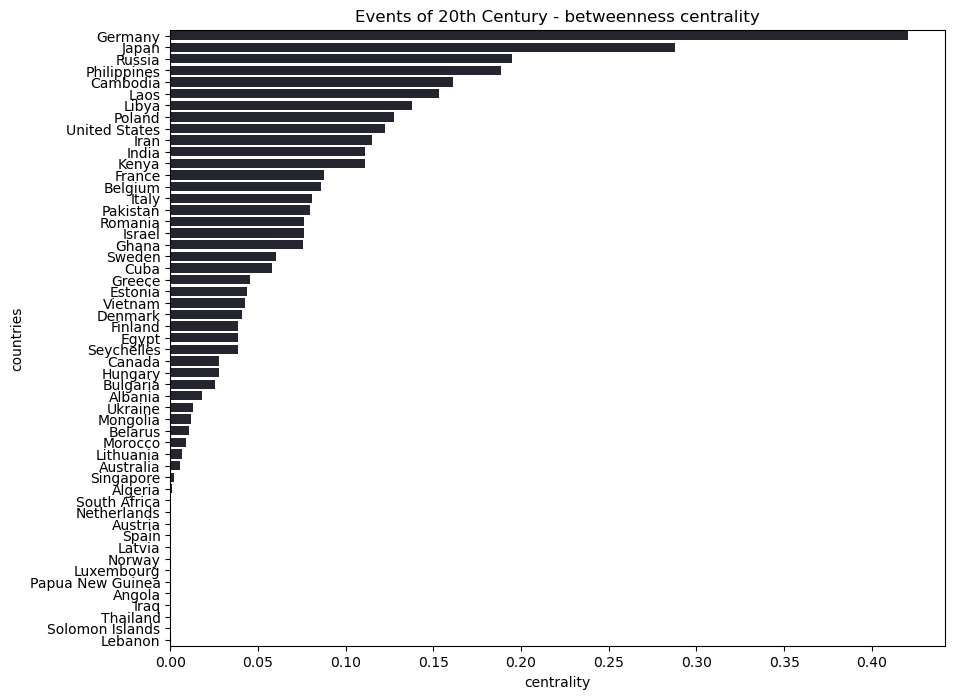

In [77]:
plt.figure(figsize = (10, 8))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("Events of 20th Century - betweenness centrality")

The plot of betweenness centrality shows that Germany, Japan, and Russia played important roles as go-betweens in the network of 20th-century events, reinforcing their positions as key players in global geopolitics. The unexpected significance of countries like the Philippines and Cambodia suggests their strategic importance in specific conflicts. Overall, the plot gives insight into the different roles played by countries in connecting various global events, with some countries acting as crucial links and others playing more peripheral roles.

In [80]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')